In [1]:
# 라이브러리 버전을 맞춥니다.
!pip install pandas==1.3.4

In [2]:
# 버전 확인용
import pandas as pd

print("판다스 버전 :", pd.__version__)

판다스 버전 : 1.3.4


In [3]:
import pandas as pd

# 시각화 툴
import matplotlib.pyplot as plt
%matplotlib inline

# 한글이 출력되도록 설정합니다.
plt.rc('font', family='Malgun Gothic')

# 선명한 그래픽
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\it\AppData\Local\Temp\ipykernel_19308\2995353899.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [4]:
# 경기도 진료내역정보 파일 불러오기
filepath = './data'
doctor_data_1 = pd.read_csv(filepath + "/HP_T20_2020_1.CSV", encoding='cp949')  # ①
doctor_data_2 = pd.read_csv(filepath + "/HP_T20_2020_2.CSV", encoding='cp949')
doctor_data_3 = pd.read_csv(filepath + "/HP_T20_2020_3.CSV", encoding='cp949')

doctor_data_1.head(2)

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
0,2020,29,3724043,1,17,41,2020-12-21,3,1,I109,E785,1,1,0.15,11540,1500,10040,0,2021-12-28
1,2020,29,3495225,1,17,41,2020-12-14,3,1,I109,E785,1,1,0.15,11540,1500,10040,7,2021-12-28


In [5]:
doctor_data = pd.concat([doctor_data_1, doctor_data_2, doctor_data_3]) #①
target_cols = ['성별코드','연령대코드','진료과목코드','주상병코드','부상병코드']
doctor_data_short = doctor_data[target_cols] #②

print("2020년 진료행위 총 :",doctor_data_short.shape[0], "회") #③
doctor_data_short.head(2)

2020년 진료행위 총 : 11727248 회


,성별코드,연령대코드,진료과목코드,주상병코드,부상병코드
0,1,17,1,I109,E785
1,1,17,1,I109,E785


In [6]:
# 진료과목코드정보 파일 불러오기
# 앞에서 드라이브 경로를 설정(본인의 환경에 맞게 수정)했으므로 data 폴더 경로는 추가하지 않습니다.

treat_code = pd.read_excel(filepath + "/진료과목코드정보.xlsx")

In [7]:
treat_code.dropna(inplace=True)

In [8]:
treat_code.head(2)

,코드구분,설명,코드,명칭
0,진료과목코드,분석차원_진료과목코드,0,일반의
1,진료과목코드,분석차원_진료과목코드,1,내과


In [9]:
treat_code = treat_code[['코드','명칭']]

In [10]:
treat_code.rename(columns={'코드':'진료과목코드_str', "명칭":"진료과목"}, inplace=True)

In [11]:
treat_code.head(3)

,진료과목코드_str,진료과목
0,0,일반의
1,1,내과
2,2,신경과


In [12]:
code = '1'
print("zfill()에 2로 지정하면 ",code.zfill(2))
print("zfill()에 3로 지정하면 ",code.zfill(3))

zfill()에 2로 지정하면  01
zfill()에 3로 지정하면  001


In [13]:
treat_code['진료과목코드_str'] = treat_code['진료과목코드_str'].apply(lambda x:str(x).zfill(2))

In [14]:
treat_code.head(3)

,진료과목코드_str,진료과목
0,00,일반의
1,01,내과
2,02,신경과


In [15]:
doctor_data_short['진료과목코드_str']=doctor_data_short['진료과목코드'].apply(lambda x:str(x).zfill(2))

C:\Users\it\AppData\Local\Temp\ipykernel_19308\1936607963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doctor_data_short['진료과목코드_str']=doctor_data_short['진료과목코드'].apply(lambda x:str(x).zfill(2))


In [16]:
doctor_data_short.reset_index(drop=True, inplace=True) #①
doctor_data_short.head(1)

,성별코드,연령대코드,진료과목코드,주상병코드,부상병코드,진료과목코드_str
0,1,17,1,I109,E785,01


In [17]:
doctor_data_short = pd.merge(doctor_data_short, treat_code, how='left', on='진료과목코드_str')

In [18]:
doctor_data_short.head(2)

,성별코드,연령대코드,진료과목코드,주상병코드,부상병코드,진료과목코드_str,진료과목
0,1,17,1,I109,E785,01,내과
1,1,17,1,I109,E785,01,내과


In [19]:
print("2020년 진료과목별 진료횟수 Top20")
doctor_data_short['진료과목'].value_counts()[:20]

2020년 진료과목별 진료횟수 Top20


내과         3862137
정형외과       2109860
이비인후과       965156
안과          830926
피부과         625814
외과          404613
소아청소년과      399236
산부인과        395229
정신건강의학과     375525
가정의학과       346533
비뇨의학과       326217
신경외과        263112
신경과         235572
마취통증의학과     199868
재활의학과       155763
응급의학과       100935
일반의          47631
흉부외과         30657
영상의학과        17239
성형외과         16529
Name: 진료과목, dtype: int64

<BarContainer object of 32 artists>

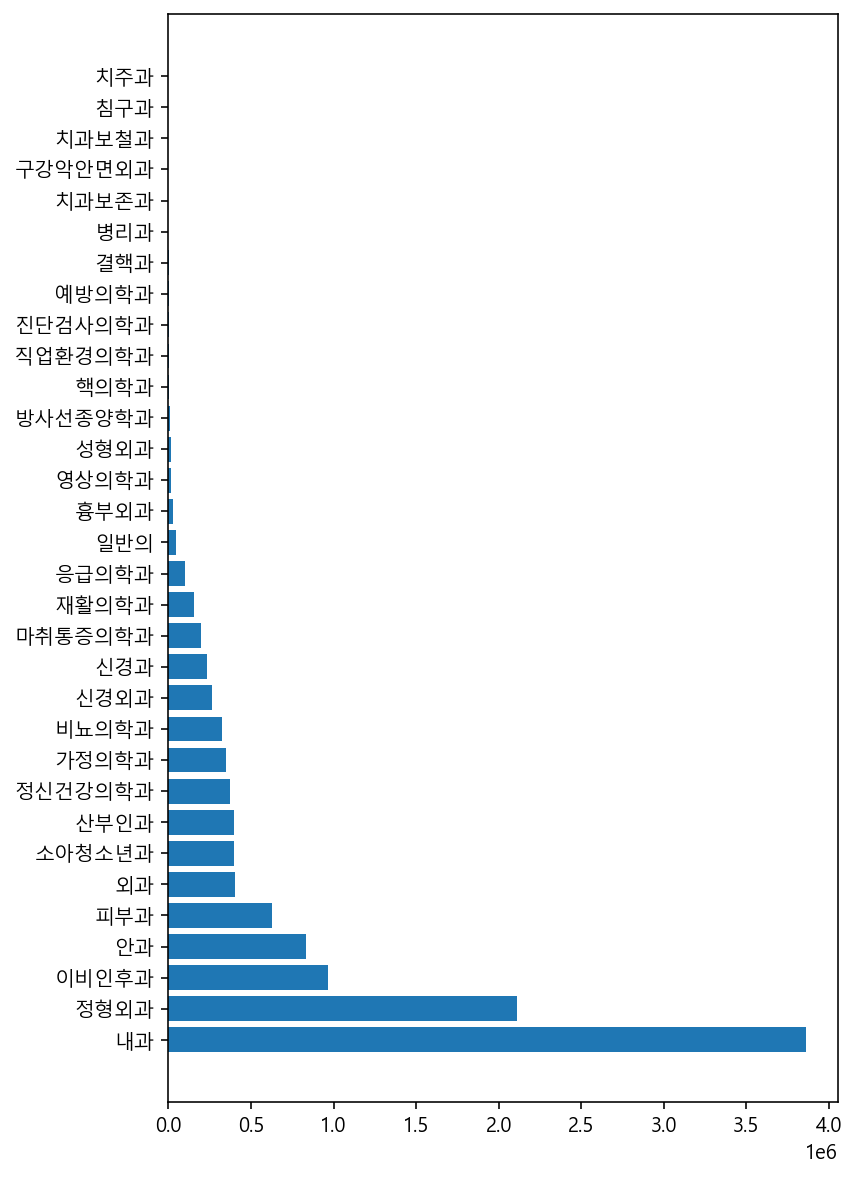

In [20]:
x_hospitals = list(doctor_data_short['진료과목'].value_counts().index) #①
y_hos_values = doctor_data_short['진료과목'].value_counts().values #②

plt.figure(figsize=(6, 10))
plt.barh(x_hospitals, y_hos_values)

In [21]:
# 건강보험심사평가원 파일 불러오기
# 앞에서 드라이브 경로를 설정(본인의 환경에 맞게 수정)했으므로 data 폴더 경로는 추가하지 않습니다.

disease_code = pd.read_csv (filepath + "/건강보험심사평가원_상병마스터_20210101.csv", encoding = 'cp949')
disease_code.head(2)

,상병기호,한글명,영문명,완전코드구분,주상병사용구분,법정감염병구분,성별구분,상한연령,하한연령,양한방구분,통계청 5차 정오 반영내역
0,A00,콜레라,Cholera,N,NaN,제2급,NaN,NaN,NaN,양·한방 공통,NaN
1,A000,비브리오 콜레라 01 콜레라형균에 의한 콜레라,"Cholera due to Vibrio cholerae 01, biovar chol...",NaN,NaN,제2급,NaN,NaN,NaN,양·한방 공통,NaN


In [22]:
disease_code = disease_code.iloc[:,:2] #①
disease_code.rename(columns={"상병기호":"주상병코드"}, inplace=True)

In [23]:
disease_code.head(2)

,주상병코드,한글명
0,A00,콜레라
1,A000,비브리오 콜레라 01 콜레라형균에 의한 콜레라


In [24]:
doctor_data_short.head(1)

,성별코드,연령대코드,진료과목코드,주상병코드,부상병코드,진료과목코드_str,진료과목
0,1,17,1,I109,E785,01,내과


In [25]:
doctor_data_short = pd.merge(doctor_data_short, disease_code, on='주상병코드', how='left')

In [26]:
doctor_data_short.head(2)

,성별코드,연령대코드,진료과목코드,주상병코드,부상병코드,진료과목코드_str,진료과목,한글명
0,1,17,1,I109,E785,01,내과,기타 및 상세불명의 원발성 고혈압
1,1,17,1,I109,E785,01,내과,고혈압(동맥성)(본태성)(원발성)(전신)


In [27]:
def findSex(num):
    """성별코드를 해석하는 함수"""
    if num==1:
        return "남"
    else:
        return "여"

def ageCode(num):
    """연령대 분류하는 함수"""
    if (num == 1) or (num == 2):
        return "9세미만"
    elif (num == 3) or (num == 4):
        return "10대"
    elif (num == 5) or (num == 6):
        return "20대"
    elif (num == 7) or (num == 8):
        return "30대"
    elif (num == 9) or (num == 10):
        return "40대"
    elif (num == 11) or (num == 12):
        return "50대"
    elif (num == 13) or (num == 14):
        return "60대"
    elif (num == 15) or (num == 16):
        return "70대"
    elif num == 17:
        return "80대"
    else:
        return "80대이상"


In [28]:
doctor_data_short['성별']=doctor_data_short['성별코드'].apply(lambda x:findSex(num=x)) #①
doctor_data_short['연령대']=doctor_data_short['연령대코드'].apply(lambda x:ageCode(num=x))
doctor_data_short.head(3)

,성별코드,연령대코드,진료과목코드,주상병코드,부상병코드,진료과목코드_str,진료과목,한글명,성별,연령대
0,1,17,1,I109,E785,01,내과,기타 및 상세불명의 원발성 고혈압,남,80대
1,1,17,1,I109,E785,01,내과,고혈압(동맥성)(본태성)(원발성)(전신),남,80대
2,1,17,1,I109,E785,01,내과,기타 및 상세불명의 원발성 고혈압,남,80대


In [29]:
# 2020년 진료정보 파일 저장하기
# 앞에서 드라이브 경로를 설정(본인의 환경에 맞게 수정)했으므로 data 폴더 경로는 추가하지 않습니다.

doctor_data_short.to_csv(filepath + "/2020년_진료정보.csv", index=False)